In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In [2]:
vasili_stats = "~/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/plots/SupTable_Sample_Stats_wGT_QC.tsv"
metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"

vasili_table = pd.read_csv(vasili_stats, sep="\t")
sub_vasili = vasili_table.loc[(vasili_table.finalQC != "fail")
                              & (vasili_table.cov_chrA >= 20)
                              & (vasili_table.remove_as_relative != True)
                              & (vasili_table.remove_manual != True)
                              & (~vasili_table.ID.str.startswith("SAMEA11633"))
                             ]

In [4]:
female_IDs = sub_vasili.loc[sub_vasili.gSEX == "F"].ID

In [17]:
df_l = []
for s in sub_vasili.species_genotyping.unique():
    f_c = len(sub_vasili.loc[sub_vasili.gSEX == "F"])
    if f_c == 0:
        continue
    # Read het df
    het_df_path = "../results/window_stats/{}_100kb_het.txt".format(s)
    if os.path.exists("../results/window_stats/{}_100kb_het.txt".format(s)):
        het_df = pd.read_csv(het_df_path, sep="\t")
    else:
        print("Not present:", s)
        continue
    het_df = het_df.loc[het_df.GVCF_ID.isin(female_IDs) &
                        (het_df.callable_frac > 0.75) &
                       (~het_df.het.isna())]
    if sum(het_df.chr_type == "chrX") < 10 or sum(het_df.chr_type == "aut") < 10:
        print("Too little data", s)
        continue
    df_l.append(het_df)
all_het_df = pd.concat(df_l)

Too little data Aotus_griseimembra_ssp
Too little data Aotus_vociferans_ssp
Too little data Alouatta_caraya_ssp
Too little data Ateles_paniscus_ssp
Too little data Lagothrix_lagotricha_ssp
Too little data Callimico_goeldii_ssp
Too little data Callithrix_geoffroyi_ssp
Too little data Callithrix_kuhlii_ssp
Too little data Cebuella_pygmaea_ssp
Too little data Mico_humilis_ssp
Too little data Carlito_syrichta_ssp
Too little data Cephalopachus_bancanus_ssp
Too little data Tarsius_dentatus_ssp
Too little data Tarsius_lariang_ssp
Too little data Tarsius_wallacei_ssp
Too little data Cercopithecus_campbelli_ssp
Too little data Cercopithecus_cephus_ssp
Too little data Cercopithecus_diana_ssp
Too little data Cercopithecus_neglectus_ssp
Too little data Cercopithecus_nictitans_ssp
Too little data Cercopithecus_petaurista_ssp
Too little data Cercopithecus_pogonias_ssp
Too little data Allochrocebus_solatus_ssp
Too little data Chlorocebus_dryas_ssp
Too little data Chlorocebus_pygerythrus_ssp
Too littl

[Text(0.5, 1.0, 'Per individual')]

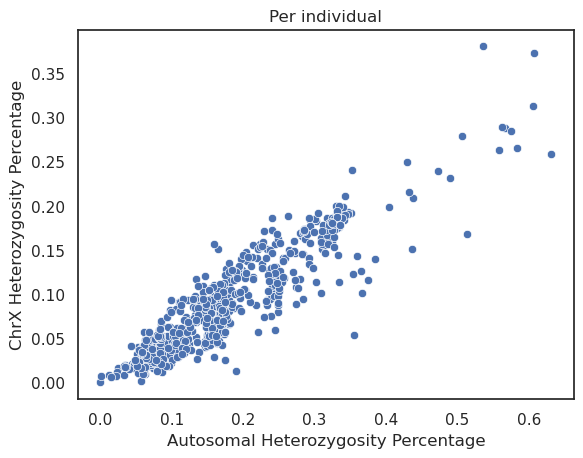

In [23]:
mean_het_df = all_het_df.groupby(["GVCF_ID","chr_type"])[["het"]].mean()
mean_het_df = mean_het_df.reset_index().pivot(columns="chr_type", index="GVCF_ID", values="het")
mean_het_df["Autosomal Heterozygosity Percentage"] = mean_het_df.aut/1000
mean_het_df["ChrX Heterozygosity Percentage"] = mean_het_df.chrX/1000
mean_het_df["X_a_ratio"] = mean_het_df.chrX/mean_het_df.aut
g = sns.scatterplot(mean_het_df, x="Autosomal Heterozygosity Percentage", y="ChrX Heterozygosity Percentage")
g.set(title="Per individual")

[Text(0.5, 1.0, 'Mean across species')]

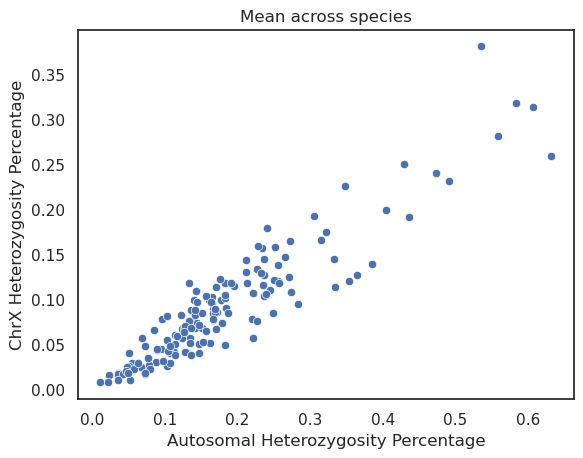

In [24]:
mean_het_df = all_het_df.groupby(["species","chr_type"])[["het"]].mean()
mean_het_df = mean_het_df.reset_index().pivot(columns="chr_type", index="species", values="het")
mean_het_df["Autosomal Heterozygosity Percentage"] = mean_het_df.aut/1000
mean_het_df["ChrX Heterozygosity Percentage"] = mean_het_df.chrX/1000
mean_het_df["X_a_ratio"] = mean_het_df.chrX/mean_het_df.aut
g = sns.scatterplot(mean_het_df, x="Autosomal Heterozygosity Percentage", y="ChrX Heterozygosity Percentage")
g.set(title="Mean across species")

In [33]:
mean_het_df.sort_values("aut")

chr_type,aut,chrX,X_a_ratio,Autosomal Heterozygosity Percentage
species,,,,
Rhinopithecus_strykeri_ssp,11.596536,7.885502,0.679988,0.011597
Semnopithecus_schistaceus_ssp,21.692308,7.665605,0.353379,0.021692
Alouatta_palliata_ssp,23.937167,16.212321,0.677287,0.023937
Trachypithecus_poliocephalus_ssp,35.153846,10.423667,0.296516,0.035154
Leontopithecus_rosalia_ssp,35.758887,18.016279,0.503827,0.035759
...,...,...,...,...
Eulemur_fulvus_ssp,535.232039,380.595925,0.711086,0.535232
Aotus_nancymaae_ssp,558.641727,281.612615,0.504102,0.558642
Cercopithecus_ascanius_ssp,582.633409,317.898616,0.545624,0.582633


<Axes: xlabel='Autosomal Heterozygosity Percentage', ylabel='X_a_ratio'>

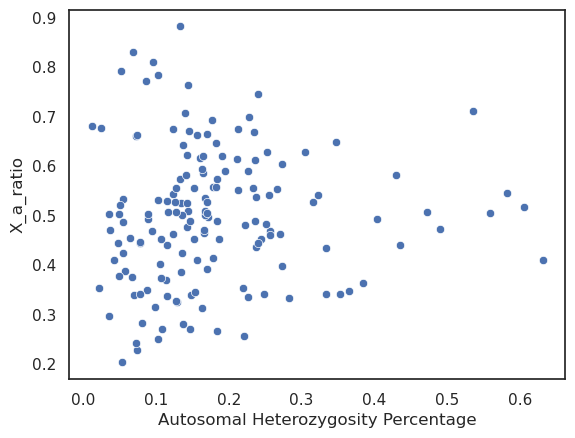

In [49]:
mean_het_df = all_het_df.groupby(["species","chr_type"])[["het"]].mean()
mean_het_df = mean_het_df.reset_index().pivot(columns="chr_type", index="species", values="het")
mean_het_df["X_a_ratio"] = mean_het_df.chrX/mean_het_df.aut
mean_het_df["Autosomal Heterozygosity Percentage"] = mean_het_df.aut/1000
mean_het_df["ChrX Heterozygosity Percentage"] = mean_het_df.chrX/1000
sns.scatterplot(mean_het_df, x="Autosomal Heterozygosity Percentage", y="X_a_ratio")

In [40]:
mean_het_df.loc[mean_het_df.aut >= 200].sort_values("X_a_ratio")

chr_type,aut,chrX,X_a_ratio,Autosomal Heterozygosity Percentage
species,,,,
Mandrillus_leucophaeus_ssp,220.785235,56.650522,0.256587,0.220785
Semnopithecus_priam_ssp,283.153846,94.580266,0.334024,0.283154
Semnopithecus_entellus_ssp,226.923077,76.289446,0.336191,0.226923
Allochrocebus_lhoesti_ssp,248.643958,84.792816,0.341021,0.248644
Microcebus_murinus_ssp,352.825648,120.359498,0.341130,0.352826
Cheirogaleus_sibreei_ssp,333.515625,114.029605,0.341902,0.333516
Trachypithecus_vetulus_ssp,364.692308,126.429352,0.346674,0.364692
Cercocebus_atys_ssp,219.823046,77.556439,0.352813,0.219823
Hapalemur_griseus_ssp,384.425813,139.595318,0.363127,0.384426


<Axes: xlabel='X_a_ratio', ylabel='Count'>

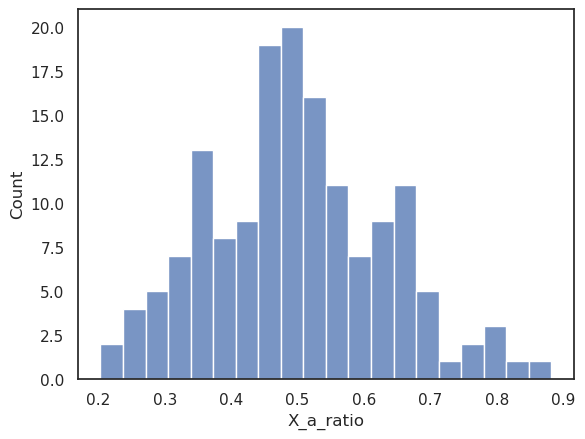

In [41]:
sns.histplot(mean_het_df.X_a_ratio, bins=20)

In [42]:
mean_het_df.X_a_ratio.mean(), mean_het_df.X_a_ratio.median()

(0.4977536248130766, 0.4992774108912227)

In [50]:
mating_vas = pd.read_excel("../data/PrimatePhenotypes_august.xlsx", sheet_name=8)
mating_vas

,binomial_name,Monogamous,Polygynous,Polygynandrous,Polyandrous,lowSC,highSC,consensus,comment,Juliana_Christina,genus_comment
0,Allenopithecus_nigroviridis,0,0,1,0,0,1,Polygynandrous,NaN,NaN,NaN
1,Allocebus_trichotis,2,1,0,0,3,0,Monogamous,NaN,NaN,NaN
2,Allochrocebus_lhoesti,0,3,0,0,3,0,Polygynous,NaN,NaN,NaN
3,Allochrocebus_preussi,0,1,0,0,1,0,Polygynous,NaN,NaN,NaN
4,Allochrocebus_solatus,0,1,0,0,1,0,Polygynous,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
311,Trachypithecus_phayrei,0,2,1,0,2,1,NaN,conflicting,NaN,NaN
312,Trachypithecus_pileatus,0,2,0,0,2,0,Polygynous,NaN,NaN,NaN
313,Trachypithecus_selangorensis,0,1,0,0,1,0,Polygynous,NaN,NaN,NaN
314,Varecia_rubra,0,1,1,0,1,1,NaN,conflicting,NaN,NaN


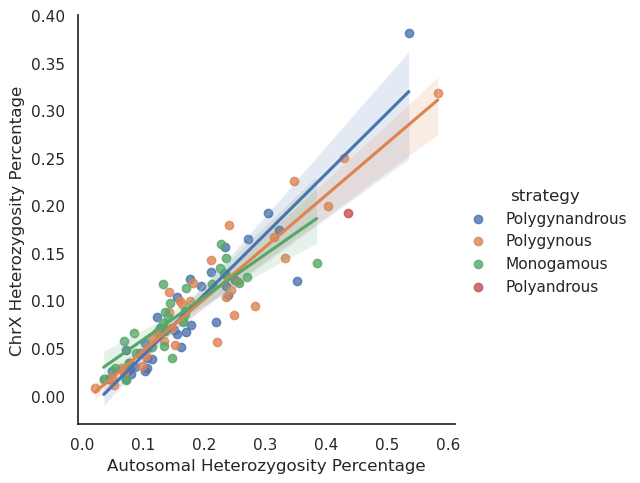

In [51]:
mean_het_df["binomial_name"] = [x[:-4] for x in mean_het_df.index]
mean_het_df["strategy"] = mean_het_df.binomial_name.map(dict(zip(mating_vas.binomial_name, mating_vas.consensus)))
sns.lmplot(mean_het_df, x="Autosomal Heterozygosity Percentage", y="ChrX Heterozygosity Percentage", hue="strategy")

In [52]:
mean_het_df

chr_type,aut,chrX,X_a_ratio,Autosomal Heterozygosity Percentage,ChrX Heterozygosity Percentage,binomial_name,strategy
species,,,,,,,
Allenopithecus_nigroviridis_ssp,134.200000,70.528388,0.525547,0.134200,0.070528,Allenopithecus_nigroviridis,Polygynandrous
Allochrocebus_lhoesti_ssp,248.643958,84.792816,0.341021,0.248644,0.084793,Allochrocebus_lhoesti,Polygynous
Allochrocebus_preussi_ssp,236.883740,103.444526,0.436689,0.236884,0.103445,Allochrocebus_preussi,Polygynous
Alouatta_belzebul_ssp,182.866721,118.393756,0.647432,0.182867,0.118394,Alouatta_belzebul,Polygynous
Alouatta_discolor_ssp,177.959900,99.393909,0.558519,0.177960,0.099394,Alouatta_discolor,Polygynous
...,...,...,...,...,...,...,...
Trachypithecus_phayrei_ssp,183.461538,48.966005,0.266901,0.183462,0.048966,Trachypithecus_phayrei,NaN
Trachypithecus_poliocephalus_ssp,35.153846,10.423667,0.296516,0.035154,0.010424,Trachypithecus_poliocephalus,NaN
Trachypithecus_vetulus_ssp,364.692308,126.429352,0.346674,0.364692,0.126429,Trachypithecus_vetulus,NaN


In [62]:
all_het_df.groupby(["species","chr_type", "chrom"])[["het"]].transform(pd.qcut,2, duplicates="drop")

,het
2646,"(67.0, 349.0]"
2647,"(67.0, 349.0]"
2648,"(67.0, 349.0]"
2649,"(67.0, 349.0]"
2650,"(67.0, 349.0]"
...,...
12178,"(-0.001, 187.5]"
12179,"(187.5, 544.0]"
12180,"(-0.001, 187.5]"
12181,"(-0.001, 187.5]"


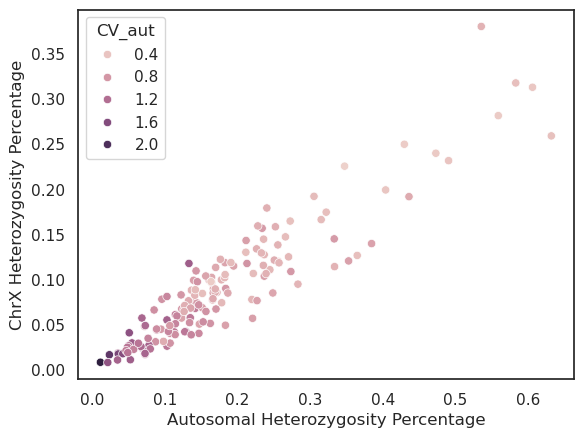

In [85]:
all_het_df_aut = all_het_df.loc[all_het_df.chr_type == "aut"]
mean_het_df = mean_het_df.reset_index()
mean_het_df["CV_aut"] = (all_het_df_aut.groupby(["species"])[["het"]].std() / all_het_df_aut.groupby(["species"])[["het"]].mean()).reset_index()["het"]

mean_het_df["Autosomal Heterozygosity Percentage"] = mean_het_df.aut/1000
mean_het_df["ChrX Heterozygosity Percentage"] = mean_het_df.chrX/1000
mean_het_df["X_a_ratio"] = mean_het_df.chrX/mean_het_df.aut
g = sns.scatterplot(mean_het_df, x="Autosomal Heterozygosity Percentage", y="ChrX Heterozygosity Percentage", hue="CV_aut")

In [83]:
(all_het_df_aut.groupby(["species"])[["het"]].std() / all_het_df_aut.groupby(["species"])[["het"]].mean()).reset_index()["het"]

0      0.453550
1      0.654346
2      0.711307
3      0.669485
4      0.552983
         ...   
149    0.700754
150    1.308324
151    0.441365
152    0.471540
153    1.255160
Name: het, Length: 154, dtype: float64

In [69]:
sns.scatterplot(mean_het_ind_df.loc[mean_het_ind_df.CV_X < 10], x="Autosomal Heterozygosity Percentage",
                y="ChrX Heterozygosity Percentage", hue="CV_aut")

ValueError: Could not interpret value `Autosomal Heterozygosity Percentage` for `x`. An entry with this name does not appear in `data`.